## Telecommunication dataset

#### Ex customer prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline

# Changing scientific numbers to float
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

## To increase the size of thw sns plot
sns.set(rc = {'figure.figsize':(8,6)})

warnings.filterwarnings(action = 'ignore')

## Listing all files_under the input directory
import os
for dirname, _,filenames in os.walk('D:\Data analysis\Python\Python_sublessons\Kaggle_competition\Telecom_cust_rev_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Importing datetime libraries

import itertools
import datetime


## Scikitlearn libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report

D:\Data analysis\Python\Python_sublessons\Kaggle_competition\Telecom_cust_rev_dataset\crm1.csv
D:\Data analysis\Python\Python_sublessons\Kaggle_competition\Telecom_cust_rev_dataset\device1.csv
D:\Data analysis\Python\Python_sublessons\Kaggle_competition\Telecom_cust_rev_dataset\rev1.csv


In [3]:
os.chdir('D:\Data analysis\Python\Python_sublessons\Kaggle_competition\Telecom_cust_rev_dataset')

## Loading and Merging datasets

In [4]:
## Loading datasets

## crm dataset
crm = pd.read_csv('./crm1.csv')
shape = crm.shape[0], crm.shape[1]

# device dataset
device = pd.read_csv('./device1.csv')
shape = device.shape[0], device.shape[1]

# revenue dataset
revenue = pd.read_csv('./rev1.csv')
shape = revenue.shape[0], revenue.shape[1]

In [5]:
# Merging datasets

merged_data = pd.merge(pd.merge(crm, device, on = 'msisdn'), revenue, on = 'msisdn')

In [ ]:
merged_data = merged_data.copy()

In [6]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213233 entries, 0 to 213232
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   msisdn         213233 non-null  object 
 1   gender         166220 non-null  object 
 2   year_of_birth  213212 non-null  float64
 3   system_status  213233 non-null  object 
 4   mobile_type    213233 non-null  object 
 5   value_segment  213233 non-null  object 
 6   imei_tac       213233 non-null  object 
 7   brand_name     211227 non-null  object 
 8   model_name     211227 non-null  object 
 9   os_name        159007 non-null  object 
 10  os_vendor      160905 non-null  object 
 11  week_number    213233 non-null  int64  
 12  revenue_usd    213233 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 22.8+ MB


In [7]:
total = merged_data.isnull().sum()
pct = total/merged_data.shape[0]

missing_data = pd.concat([total, pct], keys = ['Total', 'Percent'], axis = 1).sort_values(by = 'Total', ascending=False)

missing_data[missing_data > 0].head(6)

,Total,Percent
os_name,54226.0,0.254304
os_vendor,52328.0,0.245403
gender,47013.0,0.220477
brand_name,2006.0,0.009408
model_name,2006.0,0.009408
year_of_birth,21.0,0.000098


In [8]:
## Because the NaN values are not greater than 2% .We will simply drop the NaN values row wise

merged_data = merged_data.dropna()

merged_data.isnull().sum()

msisdn           0
gender           0
year_of_birth    0
system_status    0
mobile_type      0
value_segment    0
imei_tac         0
brand_name       0
model_name       0
os_name          0
os_vendor        0
week_number      0
revenue_usd      0
dtype: int64

## Converting categorical columns

### gender

In [11]:
merged_data['gender'].unique()

array(['Male', 'Female', 'MALE', 'FEMALE', 'M'], dtype=object)

In [12]:
## We will create a function that will convert all 'Male' values to 0 and 'Female' values to 1

def gender_convert(data):
    if data == 'Male':
        return 0
    elif data == 'MALE':
        return 0
    elif data == 'M':
        return 0
    else:
        return 1
    
## Applying the function to convert gender column

merged_data['gender'] = merged_data['gender'].apply(gender_convert)

merged_data.head()

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd
0,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883
1,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665
2,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760
3,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223
4,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059


### system_status

In [14]:
def system_status_func(data):
    if data =='ACTIVE':
        return 1
    else:
        return 0
    
merged_data['system_status'] = merged_data['system_status'].apply(system_status_func)

merged_data.head()

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd
0,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,1,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883
1,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,1,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665
2,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,1,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760
3,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,1,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223
4,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,1,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059


### mobile_type

In [16]:
def mobile_type_func(data):
    if data =='Prepaid':
        return 1
    else:
        return 0
    
merged_data['mobile_type'] = merged_data['mobile_type'].apply(mobile_type_func)

merged_data.head()

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd
0,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883
1,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665
2,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760
3,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223
4,4f5216988c44ec0a96a82a04f28b49fa,0,1988.0,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059


### Converting dtype of year_of_birth column from float to int


In [17]:
merged_data['year_of_birth'] = merged_data['year_of_birth'].astype(int)

merged_data.head()

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd
0,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883
1,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665
2,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760
3,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223
4,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059


In [18]:
## Creating a decade column from year_of_birth

def decade(data):
    divide_year = data/10
    int_decade = int(divide_year)
    multiply_year = int_decade*10
    return multiply_year

merged_data['decades'] = merged_data['year_of_birth'].apply(decade)

merged_data.head()

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,decades
0,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,1980
1,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,1980
2,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,1980
3,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,1980
4,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,1980


In [19]:
## Moving the decades column and reordering a DatFrame

merged_data = merged_data[['msisdn', 'gender', 'year_of_birth','decades',
            'system_status', 'mobile_type',
             'value_segment', 'imei_tac', 'brand_name', 'model_name', 'os_name',
             'os_vendor', 'week_number', 'revenue_usd']]

merged_data.head()

,msisdn,gender,year_of_birth,decades,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd
0,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1980,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883
1,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1980,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665
2,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1980,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760
3,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1980,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223
4,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1980,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059


In [20]:
## Creating a new column called 'age' from year_of_birth column
#  we can figure out the ages of the customers by applying the following line

merged_data['age'] = datetime.datetime.now().year - merged_data['year_of_birth']

merged_data = merged_data[['msisdn', 'gender', 'year_of_birth','decades','age',
            'system_status', 'mobile_type',
             'value_segment', 'imei_tac', 'brand_name', 'model_name', 'os_name',
             'os_vendor', 'week_number', 'revenue_usd']]

merged_data.head()

,msisdn,gender,year_of_birth,decades,age,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd
0,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1980,35,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883
1,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1980,35,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665
2,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1980,35,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760
3,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1980,35,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223
4,4f5216988c44ec0a96a82a04f28b49fa,0,1988,1980,35,1,1,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059


### Because the brand_name and os_name has too many unique values, we will use target encoding to replace the columns with the mean values for their respective revenue

In [21]:
## Brand_names

target_encoding = merged_data.groupby('brand_name')['revenue_usd'].mean().reset_index()

target_encoding.rename(columns={'revenue_usd':'brand_name_revenue_mean'}, inplace=True)

merged_data = merged_data.merge(target_encoding, on = 'brand_name', how = 'left')

In [22]:
## os_name

target_encoding =  merged_data.groupby('os_name')['revenue_usd'].mean().reset_index()

target_encoding.rename(columns={'revenue_usd':'os_name_revenue_mean'}, inplace=True)

merged_data = merged_data.merge(target_encoding, on = 'os_name', how = 'left')

In [23]:
cleaned_data = merged_data.drop(['msisdn','value_segment','imei_tac', 'model_name', 
                  'brand_name', 'os_vendor', 'os_name'], axis= 1)

cleaned_data.head()

,gender,year_of_birth,decades,age,system_status,mobile_type,week_number,revenue_usd,brand_name_revenue_mean,os_name_revenue_mean
0,0,1988,1980,35,1,1,34,8.388883,11.450734,11.688972
1,0,1988,1980,35,1,1,24,4.570665,11.450734,11.688972
2,0,1988,1980,35,1,1,30,19.584760,11.450734,11.688972
3,0,1988,1980,35,1,1,31,9.272223,11.450734,11.688972
4,0,1988,1980,35,1,1,33,13.292059,11.450734,11.688972


In [24]:
def revenue(data):
    rev = int(data)
    return rev

cleaned_data['revenue_usd'] = cleaned_data['revenue_usd'].apply(revenue)

## Data Analysis

In [25]:
## The ratio of Active users (1) to Suspended users (0)

print(f'Number of customers with Active system status: {cleaned_data[cleaned_data["system_status"] == 1]["system_status"].count()}')

print(f'Number of customers with Suspended system status: {cleaned_data[cleaned_data["system_status"] == 0]["system_status"].count()}')




Number of customers with Active system status: 121596
Number of customers with Suspended system status: 2554


In [26]:
## The number of Males (0) to Females (1)

print(f'Number of Male customers: {cleaned_data[cleaned_data["gender"] == 0]["gender"].count()}')

print(f'Number of Female customers: {cleaned_data[cleaned_data["gender"] == 1]["gender"].count()}')

Number of Male customers: 107590
Number of Female customers: 16560


In [27]:
## To calculate the proportion of female customers from the whole data

all_female_customers = round((len(cleaned_data[cleaned_data["gender"] == 0]["gender"])/len(cleaned_data)),3)

all_male_customers = 1 - all_female_customers

print("The proportion of all female customers is {} and The proportion of all male customers is {}".format(all_female_customers,
                                                                                                          all_male_customers))

The proportion of all female customers is 0.867 and The proportion of all male customers is 0.133


In [28]:
## To see the ex-customers we can create a subset of the dataframe with only Suspended customers

ex_customers = cleaned_data[cleaned_data['system_status'] == 0]

## All active accounts
active_acc = cleaned_data[cleaned_data['system_status'] == 1]

In [29]:
## Then to look at how many of those ex customers were male and female

## 240 Female customers were suspended
ex_customers[ex_customers['gender'] == 1]

## 2314 Male customers were suspended
ex_customers[ex_customers['gender'] == 0]

,gender,year_of_birth,decades,age,system_status,mobile_type,week_number,revenue_usd,brand_name_revenue_mean,os_name_revenue_mean
834,0,1993,1990,30,0,1,26,12,11.450734,11.385032
835,0,1993,1990,30,0,1,30,4,11.450734,11.385032
836,0,1993,1990,30,0,1,27,16,11.450734,11.385032
837,0,1993,1990,30,0,1,35,14,11.450734,11.385032
838,0,1993,1990,30,0,1,23,10,11.450734,11.385032
...,...,...,...,...,...,...,...,...,...,...
123092,0,1974,1970,49,0,1,27,18,11.725948,11.688972
123093,0,1974,1970,49,0,1,32,11,11.725948,11.688972
123094,0,1974,1970,49,0,1,30,10,11.725948,11.688972
123095,0,1974,1970,49,0,1,31,12,11.725948,11.688972


In [31]:
## Let's look at the proportions of suspended customers among the genders

all_female_ex_customers = round((len(ex_customers[ex_customers["gender"] == 1]["gender"])/len(ex_customers)),3)

all_male_ex_customers = round((1 - all_female_ex_customers),3)

print("The proportion of all suspended female customers is {} and The proportion of all suspended male customers is {}".format(all_female_ex_customers,
                                                                                                           all_male_ex_customers))
                                              

The proportion of all suspended female customers is 0.094 and The proportion of all suspended male customers is 0.906


### EDA

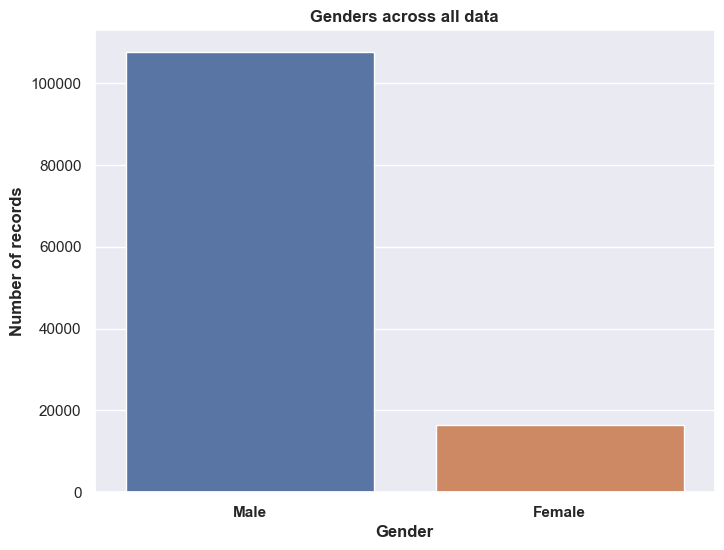

In [32]:
## Lookin at the gender spread across all data

sns.countplot(data=cleaned_data, x = 'gender')
plt.title('Genders across all data', fontweight = 'bold')
plt.xticks([0,1],labels=['Male', 'Female'], fontweight = 'bold')

plt.ylabel('Number of records', fontweight = 'bold')
plt.xlabel('Gender', fontweight = 'bold');

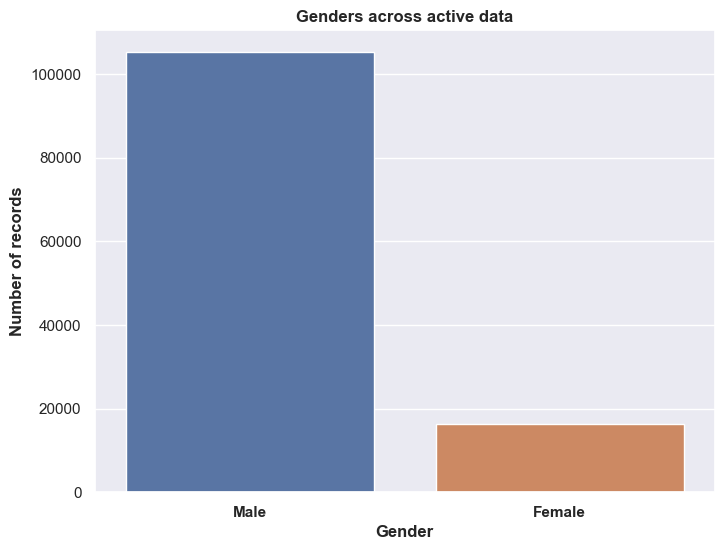

In [33]:
## Comparison of genders that use Active accounts

sns.countplot(data=active_acc, x = 'gender')
plt.title('Genders across active data', fontweight = 'bold')
plt.xticks([0,1],labels=['Male', 'Female'], fontweight = 'bold')

plt.ylabel('Number of records', fontweight = 'bold')
plt.xlabel('Gender', fontweight = 'bold');

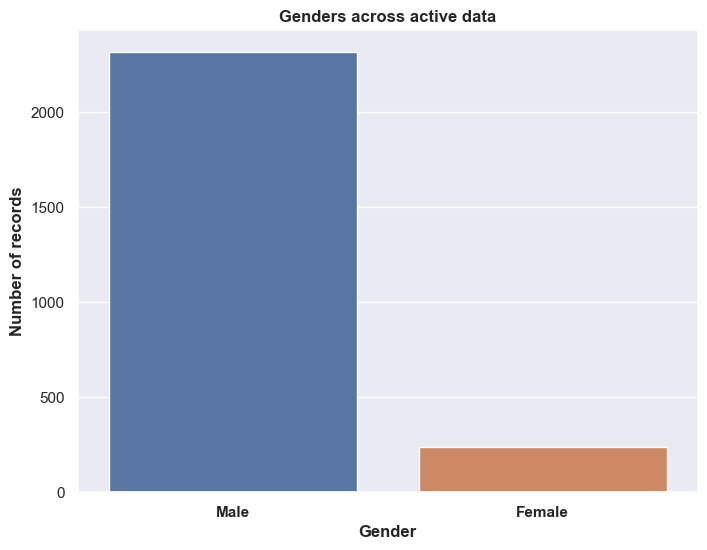

In [34]:
## Comparison of genders that have Suspended accounts

sns.countplot(data=ex_customers, x = 'gender')
plt.title('Genders across active data', fontweight = 'bold')
plt.xticks([0,1],labels=['Male', 'Female'], fontweight = 'bold')

plt.ylabel('Number of records', fontweight = 'bold')
plt.xlabel('Gender', fontweight = 'bold');

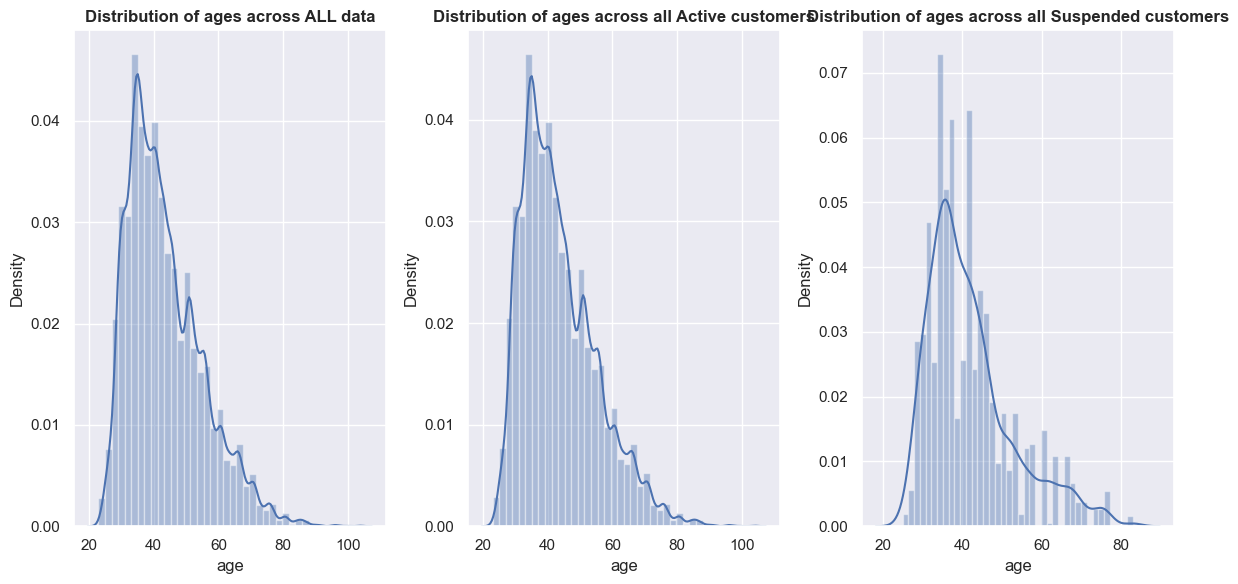

In [35]:
## These subplots will show us the Age distribution across the data, Active and Suspended

fig, axs = plt.subplots(nrows=1,ncols=3, figsize = (12,6))

ax_1 = sns.distplot(cleaned_data['age'], kde = True, bins = 40, ax=axs[0])
ax_1.set_title('Distribution of ages across ALL data', fontweight = 'bold')

ax_2 = sns.distplot(active_acc['age'], kde = True, bins = 40, ax = axs[1])
ax_2.set_title('Distribution of ages across all Active customers', fontweight = 'bold')

ax_3 = sns.distplot(ex_customers['age'], kde = True, bins = 40, ax = axs[2])
ax_3.set_title('Distribution of ages across all Suspended customers', fontweight = 'bold')


plt.tight_layout()

Text(0, 0.5, 'Revenue')

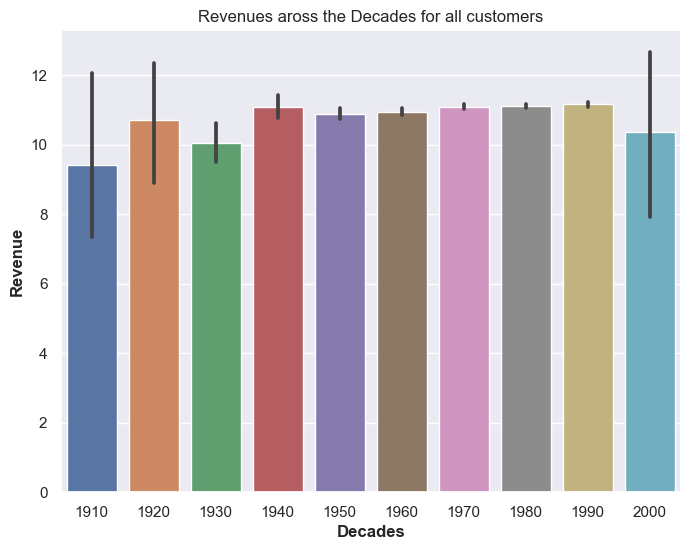

In [36]:
## Revenue across the decades for all customer

sns.barplot(data=cleaned_data, y = 'revenue_usd', x = 'decades')

plt.title('Revenues aross the Decades for all customers')
plt.xlabel('Decades', fontsize = 12, fontweight = 'bold')
plt.ylabel('Revenue',  fontsize = 12, fontweight = 'bold')

Text(0, 0.5, 'Revenue')

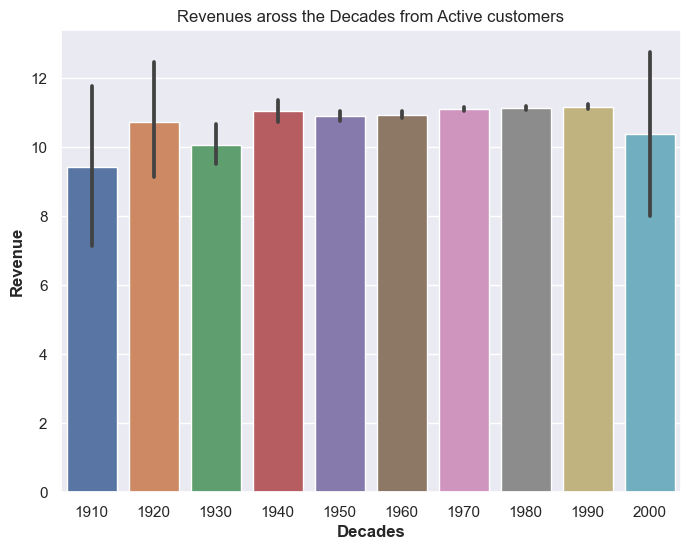

In [37]:
## Revenue across the decades from active customers

sns.barplot(data=active_acc, y = 'revenue_usd', x = 'decades')

plt.title('Revenues aross the Decades from Active customers')
plt.xlabel('Decades', fontsize = 12, fontweight = 'bold')
plt.ylabel('Revenue',  fontsize = 12, fontweight = 'bold')

Text(0, 0.5, 'Revenue')

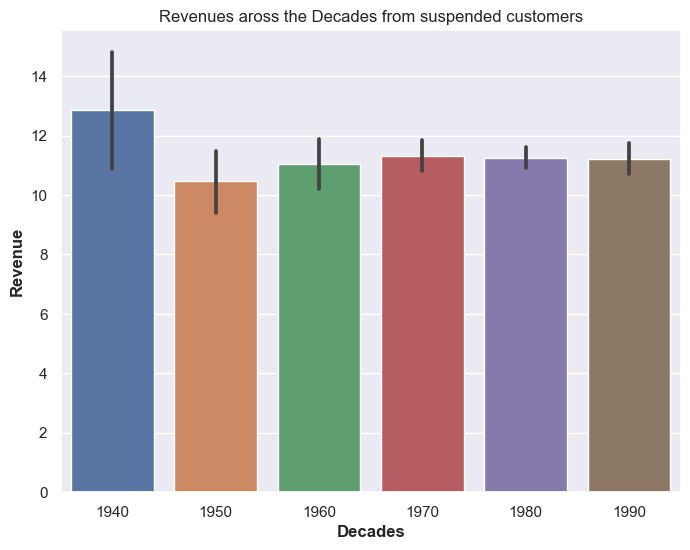

In [38]:
## Revenue across the decades from suspended customers

sns.barplot(data=ex_customers, y = 'revenue_usd', x = 'decades')

plt.title('Revenues aross the Decades from suspended customers')
plt.xlabel('Decades', fontsize = 12, fontweight = 'bold')
plt.ylabel('Revenue',  fontsize = 12, fontweight = 'bold')

# Choosing the correct model

## Train_test_split

In [39]:
X = cleaned_data.drop(['system_status'], axis = 1)

y = cleaned_data['system_status']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [41]:
print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (99320, 9)
X_test shape (24830, 9)
y_train shape (99320,)
y_test shape (24830,)


### Decision tree

In [42]:
## Evaluation that will help us to determine best Hypeparameters for max_depth and min_samples_leaf as well as the criterion
best_acc = 0
for criterion in ['gini', 'entropy']:
    for max_depth in [1,2,3,4,5]:
        for min_sample_leaf in [6,7,8,9,10]:
            dtree = DecisionTreeClassifier(max_depth = max_depth, criterion=criterion, min_samples_leaf = min_sample_leaf)
            dtree.fit(X_train, y_train)
            predictions = dtree.predict(X_test)
            test_acc = accuracy_score(y_test, predictions)
            if test_acc > best_acc:
                best_params = f"criterion {criterion}, max_depth {max_depth}, min_samples_leaf {min_sample_leaf}"
                best_acc = test_acc
                
print(f"Best parameters are {best_params}")
print(f"Best accuracy is {best_acc}")

Best parameters are criterion gini, max_depth 1, min_samples_leaf 6
Best accuracy is 0.9787354007249295


In [43]:
dtree = DecisionTreeClassifier(max_depth = 1, criterion='gini', min_samples_leaf = 6, random_state=101)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, random_state=101)

## Calculating feature importance

In [46]:
for i, column in enumerate(cleaned_data.drop(['system_status'], axis = 1)):
    print('Importance of Feature {}:, {:.3f}'.format(column, dtree.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable':[column],
                            'Feature Importance Score': [dtree.feature_importances_[i]]})
    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi = fi

Importance of Feature gender:, 0.000
Importance of Feature year_of_birth:, 1.000
Importance of Feature decades:, 0.000
Importance of Feature age:, 0.000
Importance of Feature mobile_type:, 0.000
Importance of Feature week_number:, 0.000
Importance of Feature revenue_usd:, 0.000
Importance of Feature brand_name_revenue_mean:, 0.000
Importance of Feature os_name_revenue_mean:, 0.000


In [47]:
final_fi = final_fi.sort_values(by = 'Feature Importance Score', ascending = False)

final_fi

,Variable,Feature Importance Score
1,year_of_birth,1.0
0,gender,0.0
2,decades,0.0
3,age,0.0
4,mobile_type,0.0
5,week_number,0.0
6,revenue_usd,0.0
7,brand_name_revenue_mean,0.0
8,os_name_revenue_mean,0.0


## Checking the accuracies for train and test data

In [48]:
print(f"Training Accuracy score is :{dtree.score(X_train, y_train)}")
print(f"Testing Accuracy score is :{dtree.score(X_test, y_test)}")

Training Accuracy score is :0.9796012887635924
Testing Accuracy score is :0.9787354007249295


In [50]:
## Classification report
y_pred = dtree.predict(X_test)

print(classification_report(y_test, y_pred))


## We can see that due to the fact that the data is imbalanced the model just memorized the active users ignoring the suspeded ones

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       528
           1       0.98      1.00      0.99     24302

    accuracy                           0.98     24830
   macro avg       0.49      0.50      0.49     24830
weighted avg       0.96      0.98      0.97     24830



## Imbalanced Data

### We can see clearly that the target column is imbalanced.
### So we will try to up - sample the 'Suspended' customers to create a balance between two values

In [51]:
cleaned_data['system_status'].value_counts()

1    121596
0      2554
Name: system_status, dtype: int64

<Axes: xlabel='system_status', ylabel='count'>

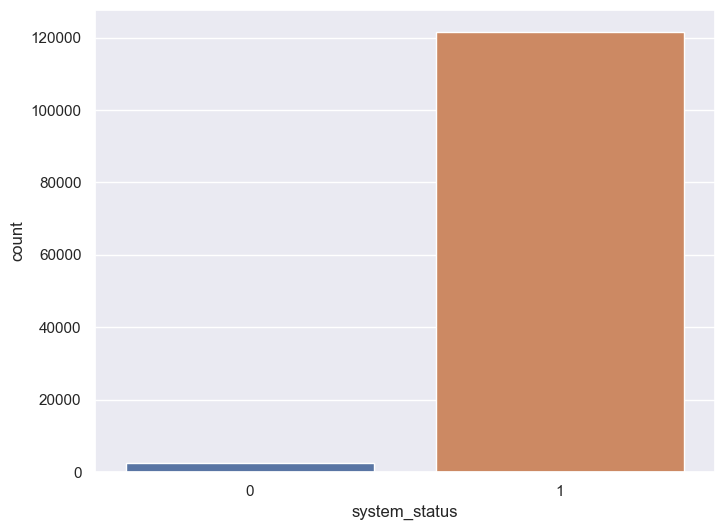

In [52]:
sns.countplot(data = cleaned_data, x = 'system_status')

In [53]:
from sklearn.utils import resample

In [54]:
## Dividing the data into 'Active' and 'Suspended' customers' dataset

df_minority = cleaned_data[cleaned_data['system_status'] == 0]
df_majority = cleaned_data[cleaned_data['system_status'] == 1]

In [55]:
## Synthetically up-sampling the 'Suspended' customers to create balance between values

df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=121596,
                                 random_state=101)

In [56]:
## Joining those samples together
sampled = pd.concat([df_minority_upsampled, df_majority])

In [57]:
sampled['system_status'].value_counts()

0    121596
1    121596
Name: system_status, dtype: int64

In [58]:
sampled = sampled.reset_index().drop(['index'], axis = 1)

### Trying to build a Decision tree model on that sample data

In [60]:
X = sampled.drop(['system_status'], axis = 1)

y = sampled['system_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [61]:
best_acc = 0
for criterion in ['gini', 'entropy']:
    for max_depth in [1,2,3,4,5]:
        for min_sample_leaf in [6,7,8,9,10]:
            dtree = DecisionTreeClassifier(max_depth = max_depth, criterion=criterion, min_samples_leaf = min_sample_leaf)
            dtree.fit(X_train, y_train)
            predictions = dtree.predict(X_test)
            test_acc = accuracy_score(y_test, predictions)
            if test_acc > best_acc:
                best_params = f"criterion {criterion}, max_depth {max_depth}, min_samples_leaf {min_sample_leaf}"
                best_acc = test_acc
                
print(f"Best parameters are {best_params}")
print(f"Best accuracy is {best_acc}")

Best parameters are criterion gini, max_depth 5, min_samples_leaf 6
Best accuracy is 0.6060157486790436


In [62]:
dtree = DecisionTreeClassifier(max_depth = 5, criterion='gini', min_samples_leaf = 6, random_state=101)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=101)

In [63]:
for i, column in enumerate(cleaned_data.drop(['system_status'], axis = 1)):
    print('Importance of Feature {}:, {:.3f}'.format(column, dtree.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable':[column],
                            'Feature Importance Score': [dtree.feature_importances_[i]]})
    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi = feat_imp

Importance of Feature gender:, 0.038
Importance of Feature year_of_birth:, 0.302
Importance of Feature decades:, 0.048
Importance of Feature age:, 0.094
Importance of Feature mobile_type:, 0.000
Importance of Feature week_number:, 0.000
Importance of Feature revenue_usd:, 0.000
Importance of Feature brand_name_revenue_mean:, 0.327
Importance of Feature os_name_revenue_mean:, 0.189


In [64]:
## We can see that the accuracy has dropped to 60%

print(f"Training Accuracy score is :{dtree.score(X_train, y_train)}")
print(f"Testing Accuracy score is :{dtree.score(X_test, y_test)}")

Training Accuracy score is :0.6099212039906864
Testing Accuracy score is :0.6060157486790436


In [66]:
y_pred = dtree.predict(X_test)

# The accuracy dropped to 60% but we can see that at least the model started to recognize suspended users
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.82      0.67     24242
           1       0.69      0.39      0.50     24397

    accuracy                           0.61     48639
   macro avg       0.63      0.61      0.59     48639
weighted avg       0.63      0.61      0.59     48639



In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

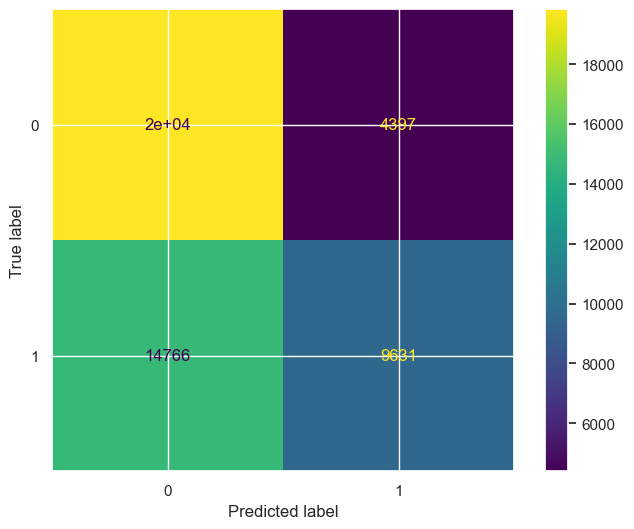

In [68]:
cm = confusion_matrix(y_test, y_pred)

graph = ConfusionMatrixDisplay(cm,display_labels=dtree.classes_)

graph.plot()

plt.show();

### Let's look at the performance of Random Forest model

In [ ]:
# best_acc = 0
# for criterion in ['gini', 'entropy']:
#     for max_depth in [1,2,3,4,5]:
#         for n_estimators in [50,100]:
#             r_forst = RandomForestClassifier(max_depth = max_depth, criterion=criterion, n_estimators = n_estimators)
#             r_forst.fit(X_train, y_train)
#             predictions = r_forst.predict(X_test)
#             test_acc = accuracy_score(y_test, predictions)
#             if test_acc > best_acc:
#                 best_params = f"criterion {criterion}, max_depth {max_depth}, n_estimators {n_estimators}"
#                 best_acc = test_acc
                
# print(f"Best parameters are {best_params}")
# print(f"Best accuracy is {best_acc}")

In [71]:
r_forest = RandomForestClassifier(n_estimators=50,criterion='gini', max_depth=5)

r_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [72]:
y_pred = r_forest.predict(X_test)

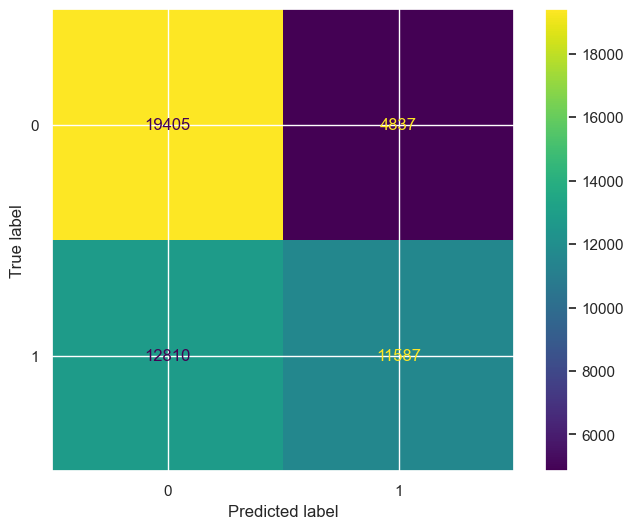

In [73]:
cm = confusion_matrix(y_test, y_pred)

graph = ConfusionMatrixDisplay(cm,display_labels=r_forest.classes_)

graph.plot()

plt.show();

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69     24242
           1       0.71      0.47      0.57     24397

    accuracy                           0.64     48639
   macro avg       0.65      0.64      0.63     48639
weighted avg       0.65      0.64      0.63     48639



### Although the performance of RF model is slightly better let's see if we can do any better

In [75]:
for i, column in enumerate(sampled.drop(['system_status'], axis = 1)):
    print('Importance of Feature {}:, {:.3f}'.format(column, r_forest.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable':[column],
                            'Feature Importance Score': [r_forest.feature_importances_[i]]})
    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi = feat_imp

Importance of Feature gender:, 0.039
Importance of Feature year_of_birth:, 0.240
Importance of Feature decades:, 0.055
Importance of Feature age:, 0.224
Importance of Feature mobile_type:, 0.012
Importance of Feature week_number:, 0.007
Importance of Feature revenue_usd:, 0.006
Importance of Feature brand_name_revenue_mean:, 0.228
Importance of Feature os_name_revenue_mean:, 0.189


### XGBClassifier

In [76]:
from xgboost import XGBClassifier

In [77]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

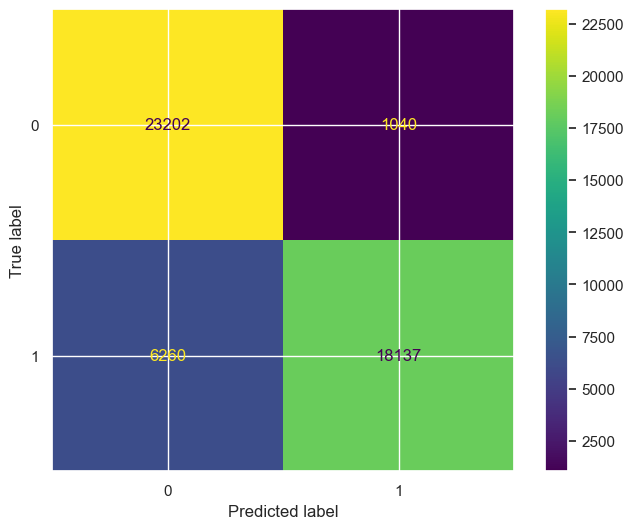

In [78]:
y_pred = xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

graph = ConfusionMatrixDisplay(cm, display_labels=r_forest.classes_)

graph.plot()

plt.show()

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     24242
           1       0.95      0.74      0.83     24397

    accuracy                           0.85     48639
   macro avg       0.87      0.85      0.85     48639
weighted avg       0.87      0.85      0.85     48639



In [80]:
for i, column in enumerate(sampled.drop(['system_status'], axis = 1)):
    print('Importance of Feature {}:, {:.3f}'.format(column, xgb.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable':[column],
                            'Feature Importance Score': [xgb.feature_importances_[i]]})
    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi = feat_imp

Importance of Feature gender:, 0.143
Importance of Feature year_of_birth:, 0.190
Importance of Feature decades:, 0.000
Importance of Feature age:, 0.000
Importance of Feature mobile_type:, 0.148
Importance of Feature week_number:, 0.048
Importance of Feature revenue_usd:, 0.050
Importance of Feature brand_name_revenue_mean:, 0.206
Importance of Feature os_name_revenue_mean:, 0.214


#### XGB model was able to predict the majority of 'Suspended' customers as well as the 'Active' ones